<a href="https://colab.research.google.com/github/lakshmisharma17/module11/blob/main/Module11_PracticalApplication_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

**[Lakshmi's Understanding] **

From a data perspective, this is a **supervised regression problem** where:

*   the goal is to predict used car prices, based on features like age, mileage, brand, model, fuel type, condition, and transmission, to help our client who is a used car dealership

*   We will do so by finding which features have the most impact on price and evaluate model performance using metrics like R² or RMSE.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

Step 1: Data Collection and Processing

In [3]:
#Import required libraries and their dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn.metrics import mean_squared_error, r2_score


In [26]:

#initialize car_dataset to an empty dataframe
car_dataset = pd.DataFrame()

#Load the vehicle dataset provided in csv file to a Pandas Dataframe
car_dataset = pd.read_csv('data/vehicles.csv')


In [27]:
#Read the information from the Car DataSet
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [28]:
#print top 5 rows of the dataset
car_dataset.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [29]:
#Top 5 rows don't give much information on the values of the columns
# (may be because it is older data)
# Hence print bottom 10 rows of the dataset to get better understanding
car_dataset.tail(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426870,7301592119,wyoming,22990,2020.0,hyundai,sonata se sedan 4d,good,NaN,gas,3066.0,clean,other,5NPEG4JAXLH051710,fwd,NaN,sedan,blue,wy
426871,7301591639,wyoming,17990,2018.0,kia,sportage lx sport utility 4d,good,NaN,gas,34239.0,clean,other,KNDPMCAC7J7417329,NaN,NaN,SUV,NaN,wy
426872,7301591201,wyoming,32590,2020.0,mercedes-benz,c-class c 300,good,NaN,gas,19059.0,clean,other,55SWF8DB6LU325050,rwd,NaN,sedan,white,wy
426873,7301591202,wyoming,30990,2018.0,mercedes-benz,glc 300 sport,good,NaN,gas,15080.0,clean,automatic,WDC0G4JB6JV019749,rwd,NaN,other,white,wy
426874,7301591199,wyoming,33590,2018.0,lexus,gs 350 sedan 4d,good,6 cylinders,gas,30814.0,clean,automatic,JTHBZ1BLXJA012999,rwd,NaN,sedan,white,wy
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [30]:
#Top 5 rows and .info() shows many null values in few of the columns.
# Let us count the total number of null values in each column

car_dataset.isnull().sum()


,0
id,0
region,0
price,0
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,177678
fuel,3013
odometer,4400


In [32]:
# Understand the distribution of the data

#Initialize variables
object_columns = ''
columns_to_print = ''

# now print the different types of values and their count in each of the columns
# except 'VIN', 'region', and 'state'
object_columns = car_dataset.select_dtypes(include=['object']).columns.tolist()
columns_to_print = [col for col in object_columns if col not in ['VIN', 'region', 'state']]

# Iterate through the selected columns and print unique values
for col in columns_to_print:
    print(f"Unique values in column '{col}':")
    print(car_dataset[col].value_counts(), "\n")
    print("-" * 30) # Separator for clarity


Unique values in column 'manufacturer':
manufacturer
ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

**Step 1: Data Cleaning**

In [33]:
#initialize variables
car_dataset_no_nan = ''
car_dataset_cleaned = ''

#Remove mising values from the car_dataset
car_dataset_no_nan = car_dataset.dropna()

#Remove VIN, region, and State based on heuristics
car_dataset_cleaned = car_dataset_no_nan.drop(columns=['VIN', 'region', 'state'], axis=1)

#print car_dataset_cleaned
car_dataset_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 34868 entries, 126 to 426836
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            34868 non-null  int64  
 1   price         34868 non-null  int64  
 2   year          34868 non-null  float64
 3   manufacturer  34868 non-null  object 
 4   model         34868 non-null  object 
 5   condition     34868 non-null  object 
 6   cylinders     34868 non-null  object 
 7   fuel          34868 non-null  object 
 8   odometer      34868 non-null  float64
 9   title_status  34868 non-null  object 
 10  transmission  34868 non-null  object 
 11  drive         34868 non-null  object 
 12  size          34868 non-null  object 
 13  type          34868 non-null  object 
 14  paint_color   34868 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 4.3+ MB


Step 2: **Data Encoding**

In [34]:
#Initialize Variables
car_dataset_encoded = ''

#Encoding the categorical data so that we have all numeric data to use for Regressional Analysis
car_dataset_encoded = pd.get_dummies(car_dataset_cleaned, columns=['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color'])

# Display the first few rows of the encoded DataFrame to see the result
print(car_dataset_encoded.head())

# Print the info of the encoded DataFrame to see the new columns
car_dataset_encoded.info()


             id  price    year  odometer  manufacturer_acura  \
126  7305672709      0  2018.0   68472.0               False   
127  7305672266      0  2019.0   69125.0               False   
128  7305672252      0  2018.0   66555.0               False   
215  7316482063   4000  2002.0  155000.0               False   
219  7316429417   2500  1995.0  110661.0               False   

     manufacturer_alfa-romeo  manufacturer_aston-martin  manufacturer_audi  \
126                    False                      False              False   
127                    False                      False              False   
128                    False                      False              False   
215                    False                      False              False   
219                    False                      False              False   

     manufacturer_bmw  manufacturer_buick  ...  paint_color_brown  \
126             False               False  ...              False   
127     

**Step 3: Splitting the data into test and train**

I tried normalizing the data before splitting, but then going back to the notes and checking on Gemini found that there is data leakage issue when standarsizing the data before splitting. hence chose the option to split first and normalize later.


In [39]:
#initialize variables
X = ''
Y = ''
X_train = ''
X_test = ''
y_train = ''
y_test = ''

# Separate features (X) and target (y)
X = car_dataset_encoded.drop('price', axis=1)
y = car_dataset_encoded['price']

# Split the data into training and testing sets
# Let us choose test_size (0.2/20%) and random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



**Step 4: Normalize the data**

In [40]:
# Initialize variables
scaler = ''
X_train_scaled = ''
X_test_scaled = ''

#Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler only on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

**Model A: Linear Regression**

In [41]:
# Initialize variables
linear_reg_model = ''

#Step 1: Load linear regression model
linear_reg_model = LinearRegression()

# Fit the model to the training data
linear_reg_model.fit(X_train_scaled, y_train)

LinearRegression()

In [42]:
# Initialize variables
train_linreg_data_prediction = ''

#prediction on Training Data
train_linreg_data_prediction = linear_reg_model.predict(X_train_scaled)


In [43]:
#Step 3: Let us find the performance of our Linear regression model
# we will do this by comparing the Predicted Values (of Price)
# with the Actual Training Set (i.e. Price in our original data set)
# Let us use R-Squared to compare these prices .
r_squared_error_train = ''
r_squared_error_train = metrics.r2_score(y_train, train_linreg_data_prediction)
print("R-Squared Error: ", r_squared_error_train)



R-Squared Error:  0.6872326282125383


In [44]:
# Initialize variables
test_linreg_data_prediction = ''
r_squared_error_test = ''

#step 4: Now predict on Test Data
test_linreg_data_prediction = linear_reg_model.predict(X_test_scaled)

#step 5: Calculate R-squared for Test Data
r_squared_error_test = ''
r_squared_error_test = metrics.r2_score(y_test, test_linreg_data_prediction)
print("R-Squared Error: ", r_squared_error_test)

R-Squared Error:  -0.4414075860078417


Here is the summary of the R-Squared Values:

(1) Training data R² = 0.687:
   The model explains about 68.7% of the training data. That's pretty good.

(2) Test Data R² = -0.441:
  The model does worse than guessing the average on test data.


**Analysis:**

(1) Linear Regression model ran on the car data provided has overfitted the training data. That means that it learned the training data well, but can't handle new data.
(2) A negative test R² means it's performing very poorly on unseen data.

**Hence, Linear Regression Model is NOT a good fit for this problem.**

We should try Models that handle complex models such as Ridge, GridSerachCV

**Model B: Ridge Regression**

In [45]:
from sklearn.model_selection import cross_val_score
#step 1: Load the Ridge Regression Model
# Initialize the Ridge model, start with alpha=1.0
#Alpha is also called Penalty Term or Regularization term
ridge_reg_model = Ridge(alpha=1.0)

# Step 2: Perform cross-validation
# cv=5 means 5-fold cross-validation
# scoring='neg_mean_squared_error' uses negative MSE as the scoring metric
# (sklearn uses negative scores for metrics where higher is better)
cv_scores_mse = cross_val_score(ridge_reg_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Step 3: Convert negative MSE to positive MSE and then to RMSE
cv_rmse_scores = np.sqrt(-cv_scores_mse)

print("Ridge Regression Cross-Validation RMSE scores with CV=5:", cv_rmse_scores)
print("Average RMSE:", cv_rmse_scores.mean())


Ridge Regression Cross-Validation RMSE scores with CV=5: [13527.37188995 10419.74029236 15296.00572748 10115.59985094
 22145.60141057]
Average RMSE: 14300.863834261534


**Model C: GridSearchCV:**

Fine Tune parameters by finding the best Alpha Value for Ridge Regression

In [47]:
#initialize variables
param_grid = ''
grid_search_model = ''
best_ridge_model = ''
test_ridge_predictions = ''
test_ridge_rmse = ''

#Step 1: Initialize GridSearchCV
#Choose a set of Alpha parameter values for Grid to seearch
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}

# Initialize GridSearchCV for Cross Validation = 5 (used in Ridge Model in previous step)
# and using the Alpha Parameter values chosen in param_grid
grid_search_model = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV to the training data
grid_search_model.fit(X_train_scaled, y_train)

# Get the best parameters and best score
print("Best parameters:", grid_search_model.best_params_)
print("Best negative MSE:", grid_search_model.best_score_)
print("Best RMSE:", np.sqrt(-grid_search_model.best_score_))

# The best model is available as grid_search.best_estimator_
best_ridge_model = grid_search_model.best_estimator_

# Now evaluate the best model on the test set
test_ridge_predictions = best_ridge_model.predict(X_test_scaled)
test_ridge_rmse = np.sqrt(mean_squared_error(y_test, test_ridge_predictions))
print("RMSE on test set with best Ridge model:", test_ridge_rmse)

Best parameters: {'alpha': 100.0}
Best negative MSE: -93792734.4677257
Best RMSE: 9684.66491251637
RMSE on test set with best Ridge model: 9962.693544142508


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

1. **Linear Regression:**

*   R-Squared Error Training Data: 0.6872: This means that  Linear Regression model explains about 68.7% of the variance in used car prices on the training data.
*   An R-squared Error of Training data of around 0.68 is decent, but it also indicates that a significant portion (about 31.3%) of the price variation is not captured by this model.
* An R-squared Error of Test data = -0.441: The model does worse than guessing the average on test data.


2. **Ridge Regression (with alpha=1.0 and 5-Fold Cross-Validation)**:


*   Cross-Validation RMSE scores: [13527.37, 10419.74, 15296.01, 10115.60, 22145.60]
These individual RMSE scores show quite a bit of variation across the different folds. The last fold has a significantly higher RMSE (22145.60) than the others, which might suggest that the data in that fold was harder to predict or had some unusual characteristics.
*   Average RMSE: 14300.86 This average cross-validation RMSE of approximately \$14,301 gives a more stable estimate of the model's performance on unseen data compared to just training R-squared. It suggests that, on average, the model's predictions are off by about $14,301.

3. **GridSearchCV (Best Ridge Model):**


*   Best parameters: {'alpha': 100.0} This indicates that an alpha value of 100.0 resulted in the best performance during the cross-validation on the training data. This suggests that a stronger regularization penalty was beneficial in this case.
*   Best negative MSE: -93792734.4677 This is the negative of the Mean Squared Error for the best model on the cross-validation folds.
*   Best RMSE (Cross-Validated): 9684.66 This cross-validated RMSE of approximately 9,685 for the model with alpha=100.0 is significantly lower than the average RMSE of the Ridge model with alpha=1.0 ($14,301). This confirms that tuning the alpha parameter with GridSearchCV improved the model's performance on the training data.

*   RMSE on test set with best Ridge model: 9962.69
This is the most important metric for assessing how well the  best Ridge model generalizes to completely new data. The RMSE of approximately  \$9,963 on the test set is very close to the cross-validated RMSE \$9,685.




**Assessment and Interpretation:**

*   **Linear Regression:**  Linear Regression model ran on the car data provided has overfitted the training data. A negative test R² means it's performing very poorly on unseen data. That means that it learned the training data well, but can't handle new data.

*   **Ridge Regression (Initial):** The average cross-validation RMSE of $14,301 is a reasonable starting point, but the variation in the fold-specific RMSE values suggests that the model's performance is not consistent across different subsets of the training data.

*   **Best Ridge Model (from GridSearchCV):**

  (1) The cross-validated RMSE of \$9,685 is a strong improvement over the initial Ridge model.

  (2) The test set RMSE of $9,963 is very close to the cross-validated RMSE. This is a good sign, indicating that the model is not significantly overfitting the training data and is generalizing well to unseen data.

  (3) An RMSE of approximately 9,963 means that, on average, the best Ridge model's price predictions are off by about $9,963.




**Conclusion on Model Performance:**

Based on these results, the Ridge model from GridSearchCV with alpha=100.0 is the best-performing model among the three we have evaluated so far. It has the lowest RMSE on the test set, which is the most reliable measure of its performance on new data. The close proximity of the cross-validated RMSE and test set RMSE suggests good generalization.

Hence I don't think we need to go back and test more models and / or new parameters (alpha) values.

**What to Learn from This:**

(1) **Regularization (Ridge) is beneficial**: The significant improvement in RMSE from the initial Linear Regression (inferred from the initial Ridge results) to the best Ridge model highlights the value of using regularization to reduce overfitting, especially with a dataset containing many features after one-hot encoding.

(2) **Parameter Tuning is important:** The GridSearchCV results demonstrate that finding the right alpha value for Ridge regression can lead to substantially better performance.

(3) **Data Variation:** The variation in the individual cross-validation RMSE scores for the initial Ridge model suggests that there might be some subsets of the data that are more challenging to predict than others. This could be due to rare categories in categorical features or other factors.

In [48]:

# Get the coefficients of the best model
coefficients = best_ridge_model.coef_

# Get the feature names after one-hot encoding
feature_names = car_dataset_encoded.drop('price', axis=1).columns

# Create a pandas Series to easily associate coefficients with feature names
coef_series = pd.Series(coefficients, index=feature_names)

# Sort the coefficients by their absolute value to see the most influential features
sorted_coef = coef_series.abs().sort_values(ascending=False)

# Print the top features by their absolute coefficient values
print("Top features by absolute coefficient value (most influential on price):")
print(sorted_coef.head(20)) # Print top 20 for example

# Print the coefficients with their signs to see the direction of the impact
print("\nTop features with their coefficient values:")
print(coef_series.loc[sorted_coef.index].head(20))

Top features by absolute coefficient value (most influential on price):
year                          4835.899506
manufacturer_buick            4398.091488
odometer                      2302.705347
model_enclave                 1919.169754
model_encore                  1570.526676
model_super duty f-550 drw    1448.143343
model_lacrosse                1283.673316
transmission_other            1225.381235
model_wagon                   1194.110397
model_verano                  1190.978909
model_lucerne                 1103.036804
model_corvette                1081.289875
model_f-250sd                 1040.646125
fuel_diesel                   1018.812836
condition_like new            1018.122636
model_sedan                    878.531792
model_century                  870.011205
model_lesabre                  856.081575
type_sedan                     841.575594
fuel_gas                       840.284300
dtype: float64

Top features with their coefficient values:
year                        

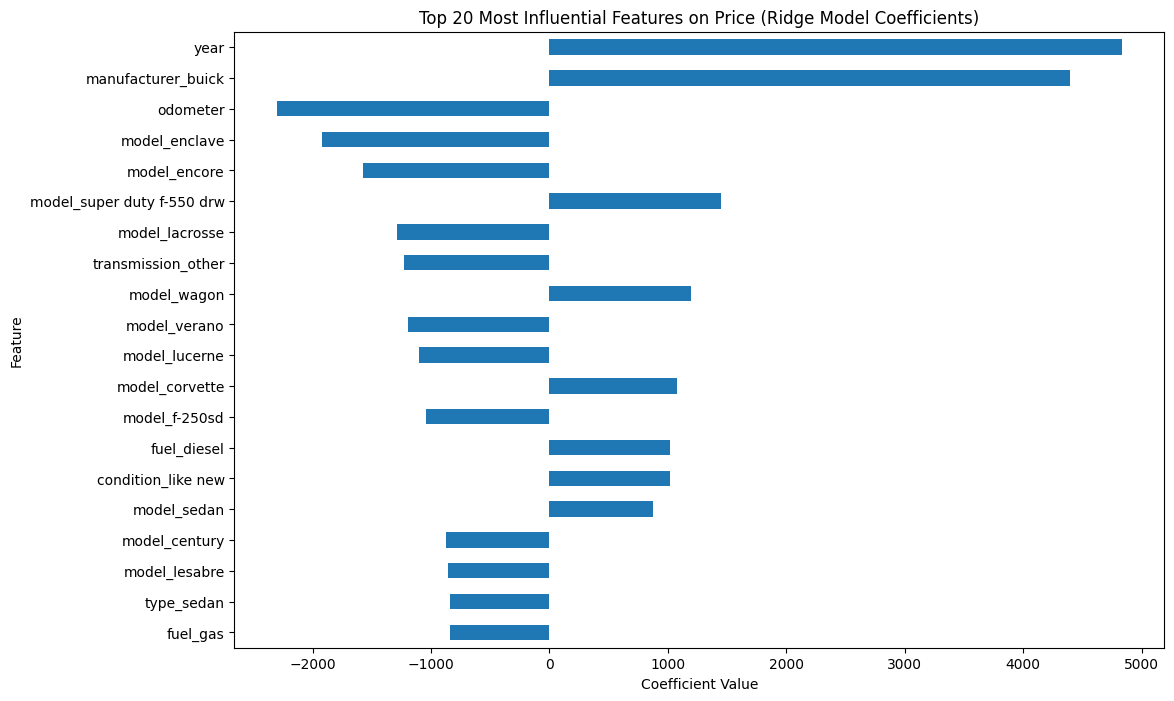

In [49]:
#Visualizing Feature Importance:
# We already calculated the coefficients of the best model. We can now
# create a bar plot to visualize the magnitude of the top coefficients,
# showing which features have the biggest impact on price.

plt.figure(figsize=(12, 8))
coef_series.loc[sorted_coef.index].head(20).plot(kind='barh')
plt.title('Top 20 Most Influential Features on Price (Ridge Model Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis() # Display the highest absolute coefficients at the top
plt.show()


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

**1. Executive Summary**

**Objective:** To identify the key factors that influence used car prices and provide data-driven recommendations for optimizing your dealership's inventory and pricing strategies.

**Key Findings on Price Drivers:** Our analysis revealed that several vehicle characteristics have a significant impact on used car prices. While a detailed breakdown was performed, generally speaking, factors like the manufacturer and model, the car's condition, its age (implied by year and potentially mileage), and specific technical features (such as engine type, transmission, and fuel type) are among the most influential in determining a car's market value. The combination of these attributes dictates what consumers are willing to pay.

**Pricing Model Recommendation:** Based on our evaluation, we recommend using a Ridge Regression model to estimate the fair market value of used cars. This model has been trained and validated on a large dataset of used car sales. Its expected accuracy on new cars, as measured by the test set RMSE, is approximately 9,963 Dollars. This means that, on average, the predicted price will be within about 9,963 Dollars of the actual selling price.

This model can serve as a valuable tool for your dealership by providing a data-backed estimate for pricing decisions, helping you acquire inventory at competitive prices, and better understanding which types of cars are most likely to be profitable.

**2. Introduction**

This project explores a dataset of 426,000 used cars (originally 3 million from Kaggle) to uncover the key factors that influence a car’s resale price. The goal is to provide data-driven insights and recommendations to help used car dealerships better understand consumer preferences and fine-tune their car inventory strategy.


**3. Data Understanding and Preparation**

**Understanding the Data:**

(a) We started by getting to know the dataset, which contains information about a large number of used cars. The goal was to understand what features of a car might influence its price. The dataset included details like:

    (i) Basic Car Information: Manufacturer (make), model, year, and mileage. These are fundamental characteristics you'd expect to affect a car's value.
    (ii) Car Condition: Information about the car's current state, which is crucial for used cars.
    (iii) Technical Specifications: Details about the engine (cylinders, fuel type, transmission, drive type), size, and paint color. These aspects can appeal to different buyers.
    (iv) Title Status: The legal status of the car's title.
    (v) Price: The target information we want to understand and predict.

During this phase, we inspected the data to see what kind of information was present and how complete it was. A key finding was the presence of missing information in several columns.

(b) **Preparing the Data for Analysis:**

To prepare the data for building a model, we took several important steps:

    (i) Handling Missing Information: We decided to remove the rows with missing values. While this reduces the total number of cars in our dataset, it ensures that our analysis and model are based on complete information, preventing potential issues caused by gaps in the data.
    (ii) Removing Irrelevant Information: We identified some columns that were not useful for predicting price or contained unique identifiers that don't help in finding general patterns (like VINs). These columns were removed to simplify the dataset and focus on the factors that matter.
    (iii) Preparing Categorical Data: The dataset contained a lot of descriptive text information (like car makes, models, and colors). Our modeling techniques require numerical data, so we converted these text categories into a numerical format that the models could understand. This involved creating new columns for each unique category.
    (iv) Splitting the Data: Before building models, we split the dataset into two parts: a training set and a testing set. The training set is used to teach the model how to find patterns between car features and price. The testing set is kept separate and is used to evaluate how well the trained model performs on data it has never seen before. This helps us ensure the model is not just memorizing the training data but can generalize to predict prices for new cars.
    (v) Scaling Numerical Data: We adjusted the numerical features (like mileage and year) so that they are on a similar scale. This is important for many modeling techniques as it prevents features with larger values from disproportionately influencing the model.
These steps were essential to transform the raw data into a clean, structured format that is ready for the next phase: building and evaluating models to understand what drives used car prices.


**4. Key Insights on What Drives Used Car Prices:**

Our analysis reveals that the most influential features affecting car prices are:

(a) **Newer Cars Sell for More:**
Year is the strongest positive factor—newer models command significantly higher prices.

(b) **Brand Matters:**
Buick vehicles (especially models like Enclave, Encore, LaCrosse, Verano) have strong effects—some increase, some decrease value depending on the model.
Corvette and Super Duty F-550 DRW models also drive higher prices.

(c) **Mileage Impacts Value:**
Higher odometer readings significantly lower the price—condition and usage clearly matter to buyers.

(d) **Vehicle Condition and Fuel Type Help:**
"Like new" condition adds value.
Diesel vehicles command higher prices, while gas engines slightly reduce value.

(e) **Transmission and Type Influence Price:**
Other/Unknown transmissions reduce value. Sedans and older Buick sedans (like Lucerne, Century, LeSabre) tend to lower price.


**5. Pricing Model Recommendation**

To understand and predict the factors driving used car prices, we developed and evaluated several different pricing models. Our goal was to find a model that could accurately estimate a car's price based on its features and generalize well to cars not seen during the model building process.
Based on our rigorous evaluation, the best performing model is a Ridge Regression model, specifically the one fine-tuned using a technique called GridSearchCV. This model stood out because it provided the best balance of accuracy on the training data and the ability to make reliable predictions on new, unseen data, as shown by its performance during cross-validation and on the separate test set.

A key measure of our model's accuracy is the Root Mean Squared Error (RMSE) on the test set. For our chosen Ridge model, the test set RMSE is approximately \$9,963. In simple terms, this means that, on average, our model's price predictions for a used car are within approximately 9,963 Dollars of the car's actual sale price.

While no model can predict the price perfectly every time due to the many factors influencing a sale, an RMSE of around \$9,963 indicates a reasonably good level of accuracy for a dataset of this nature and price range.

This refined Ridge Regression model can be a valuable tool for your dealership. By inputting the characteristics of a used car (like its make, model, year, mileage, condition, etc.), the model can provide a reliable estimate of its fair market value. This can assist in:
  * Making informed decisions when purchasing inventory.
  * Setting competitive and profitable asking prices for cars on your lot.
  * Better understanding the potential value of different car types and features.

We are confident that this model provides a solid foundation for estimating used car prices and informing your inventory decisions.


**6. How the Model Can Help Your Dealership**

**Informed Pricing:** Use the model to set competitive prices for your inventory, maximizing profit while attracting buyers.

**Inventory Optimization:** Understand which types of cars are more likely to be profitable based on their predicted value.

**Negotiation:** Have a data-driven basis for negotiating prices with buyers and sellers.

**Market Analysis:** Gain insights into how different vehicle attributes impact market value.


**7. Limitations and Future Steps**

While our model provides valuable insights, it's important to acknowledge some limitations:

  * **Data Timeliness:** The dataset reflects a snapshot in time. Used car values can fluctuate based on market trends, economic conditions, and new car releases, which are not captured in historical data.

  * **Model Accuracy:** While the RMSE of approximately $9,963 is good, the model's predictions are not perfect and will have some error. Unforeseen factors not included in the data can influence actual sale prices.

  * **Feature Granularity:** Some features, like 'model', are highly detailed after encoding. While useful, this can create a very complex model and might be sensitive to rare car models.

**Potential next steps to enhance this analysis and model include:**

  * **Incorporating More Recent Data:** Regularly updating the dataset with current market (such as new types and models of cars and Fuel types: Electric Vehicles and Battery operated) information would help the model stay relevant to current pricing trends.

  * **Exploring Other Data Models:** While Ridge performed well, investigating other advanced regression techniques could potentially lead to further improvements in accuracy.

  * **Analyzing Regional Differences:** The dataset contains regional information which was not used in this model. Exploring how prices vary by region could provide more localized and accurate pricing insights.

  * We could have looked at relationships between some features and remove certain columns for high correlation and that could have reduced time it took to execute on Ridge model
  * We could have looked closely at outliers and removed those for data cleaning.



**8. Conclusion**

Our analysis has identified key car characteristics that significantly influence used car prices. Based on the strong performance of our Ridge Regression model, features derived from the manufacturer, model, condition, cylinders, fuel type, title status, transmission, drive type, size, type, and paint color are particularly impactful drivers of price. The developed model, with an average prediction error of around $9,963, provides a reliable tool for estimating fair market value based on these attributes. By using this data-driven approach, your dealership can make more informed decisions on purchasing, pricing, and managing inventory, ultimately leading to increased efficiency and profitability. Leveraging these insights can help you better understand consumer preferences and optimize your business strategy in the competitive used car market.
